# Part II - An alarming Indonesian situation
## by Praprara Owodeha-Ashaka


## Investigation Overview


> The overall goal of this presentation is to show how calculators impact the performances of students in indonesia


## Dataset Overview

> PISA is a survey of students' skills and knowledge as they approach the end of compulsory education. This survey examines
    how well students have learned the school curriculum,
    how well prepared they are for life beyond school.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('pisa2012.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

# 1. Are Graphing Calculators the way?

> Students who use graphing calculators have the highest math scores



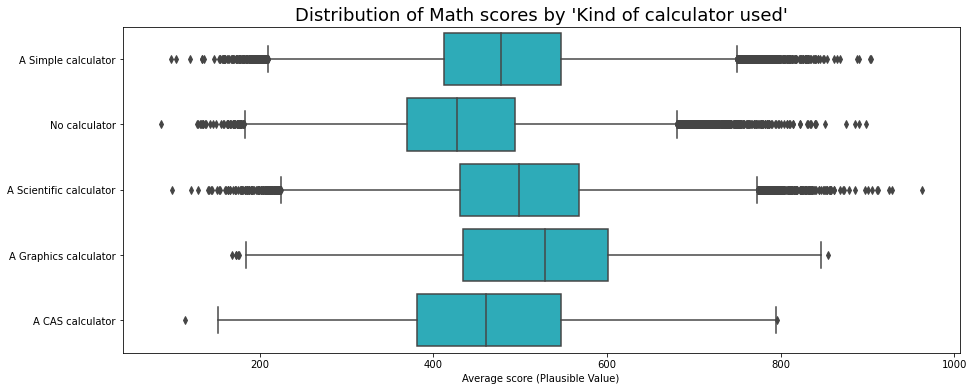

In [3]:
SADS_order = ['Strongly agree', 'Agree', 'Disagree', 'Strongly disagree']

def compare_scores_dist(dictionary, scores, order = SADS_order,
                        xlabel = 'Average score (Plausible Value)',
                        title = None):
    """
    dictionary: A dictionary with keys being a column's code names and values being the column's describtion
    scores: The column of scores who's distribution you want to look at
    order: The order in which to display the boxplots.
           Usually an ordinal arrangement of the unique values of the column reffered to in the dictionary 
    
    """
    for column in dictionary:
        plt.figure(figsize = (15,6))
        sns.boxplot(data = df, x = scores,
                    y= column , order = order, color=sns.color_palette()[9])

        plt.ylabel(f"")
        plt.xlabel(xlabel);
        if title:
            plt.title(title, fontsize = 18)
        else:
            plt.title(f"Distribution of Math scores by '{dictionary[column]}'", fontsize = 18)
        
calc_use_dict = {'CLCUSE1': 'Kind of calculator used'}
compare_scores_dist(dictionary=calc_use_dict, 
                   scores='PV1MATH', order = None)

But Graphing calculators are used by a remarkably low amount of students.

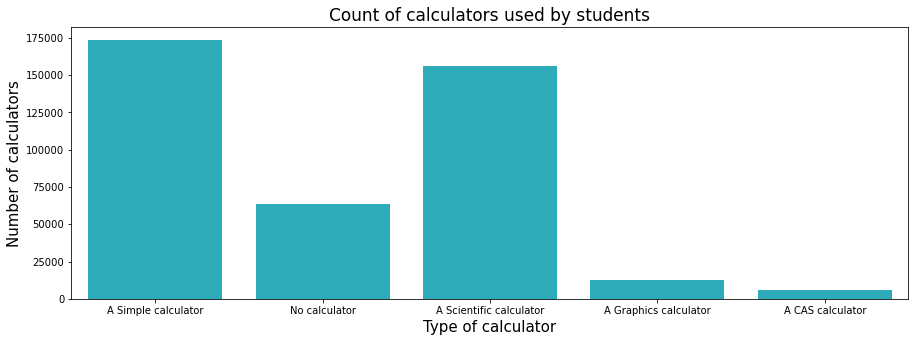

In [4]:
plt.figure(figsize = (15, 5))
sns.countplot(data = df, x = 'CLCUSE1', color=sns.color_palette()[9])
plt.title('Count of calculators used by students', fontsize = 17)
plt.xlabel('Type of calculator', fontsize = 15)
plt.ylabel('Number of calculators', fontsize = 15);

You may think that the price of the graphing calculator is the reason why it's so less popular than a simple calculator but this does not seem to be the case

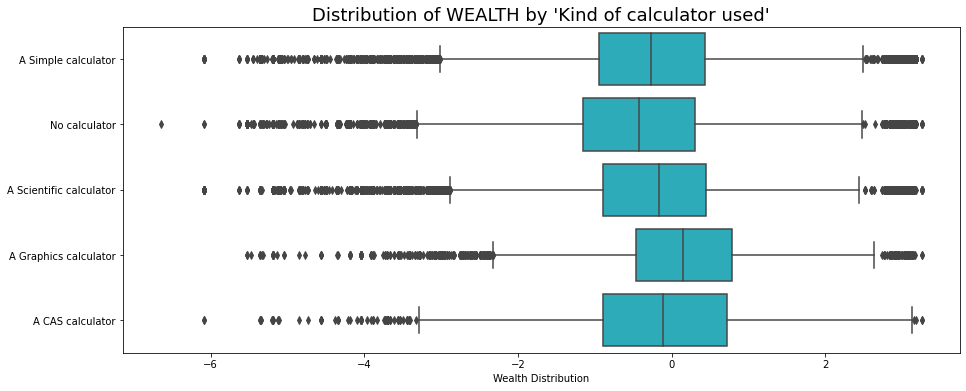

In [5]:
compare_scores_dist(dictionary=calc_use_dict, scores='WEALTH',
                    xlabel = 'Wealth Distribution', order = None,
                   title = f"Distribution of WEALTH by 'Kind of calculator used'")

People who use graphing calculators are not miles richer then people who don't. Perhaps some more research should be done to find out why many students do not use graphing calculators

# 2. No calculators in Indonesia?

> Still on Calculators, We see that 63% of students in Indonesia do not use calculators.


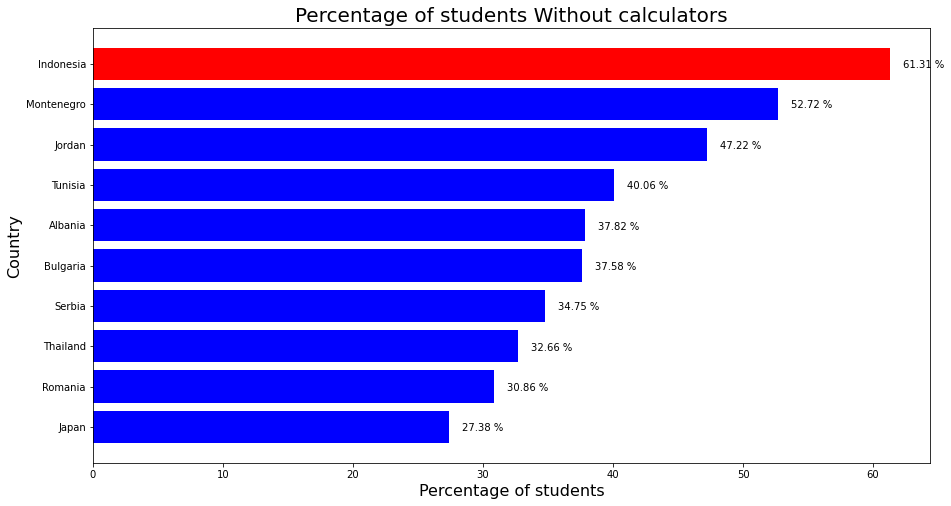

In [6]:
def age_compare_bar(series = None, figsize = (15,6),
                    figures = 2, add_annotate = '',
                    xlabel = None, ylabel = None, title = None, color = 'Blue'):
    plt.subplots(figsize = figsize)
    y = list(range(len(series)))
    plt.barh(y = y, width = series, tick_label = series.index, color = ['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',  'blue','red'])
    for position in y:
        plt.annotate(str(round(series[position], figures))+ add_annotate, xy=(series[position]+ 1,y[position]-0.1))
    plt.xlabel(xlabel, fontsize = 16)
    plt.ylabel(ylabel, fontsize = 16)
    plt.title(title, fontsize = 20)
    plt.show()
    
group_by_clc = (df.groupby('CNT')['CLCUSE1'].value_counts(normalize=True)*100).rename('proportion').reset_index()
    
age_compare_bar(series = (group_by_clc[group_by_clc.CLCUSE1 == 'No calculator'][['CNT', 'proportion']]
                 .set_index('CNT').squeeze().sort_values(ascending = True)).tail(10),
                xlabel = 'Percentage of students',
                ylabel = 'Country', figsize = (15,8),
                title = 'Percentage of students Without calculators', add_annotate = ' %')

While this may be good for their mental work, the effect overall, does not look good. This is properly represented in the country having the 2nd lowest math and science scores

In [7]:
def plot_score(course_dict, ind_colorrs):
    
    for column in course_dict:
        (df.groupby('CNT')[column].mean()
         .sort_values(ascending = True)
         .head(10).plot(kind = "barh", figsize = (15,6), color = ind_colors[column]))
        plt.xlabel('Score')
        plt.ylabel('Country')
        plt.title(f'Least 10 Average {course_dict[column]} score by country', fontsize = 17)
        plt.show()

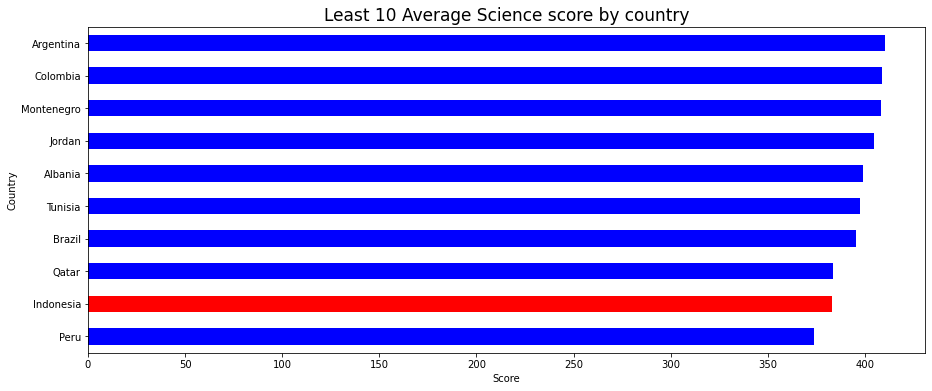

In [8]:
course_dict = {'PV1SCIE' : 'Science',}

ind_colors = {
    'PV1SCIE' : ['blue', 'red','blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',  'blue']}
plot_score(course_dict, ind_colors)

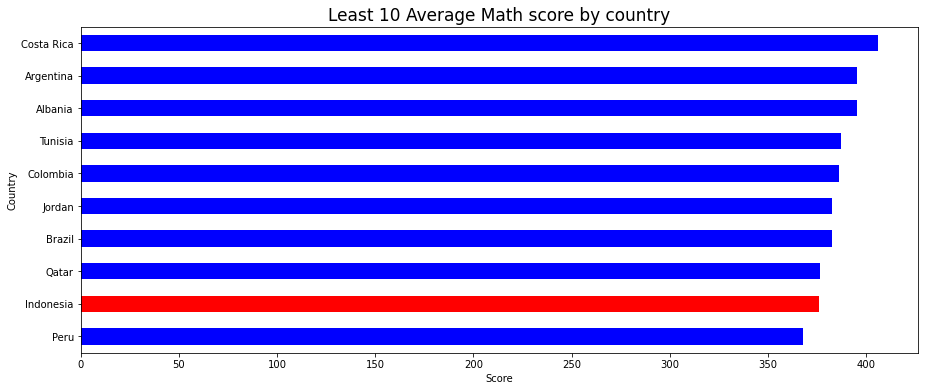

In [9]:
course_dict = {
               'PV1MATH' : 'Math'}
ind_colors = {
    'PV1MATH' : ['blue', 'red','blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue',  'blue']
}
plot_score(course_dict, ind_colors)

The fact that are higher in the rankings of average reading scores suggests strongly that the calculator is a big factor affceting their computational performace

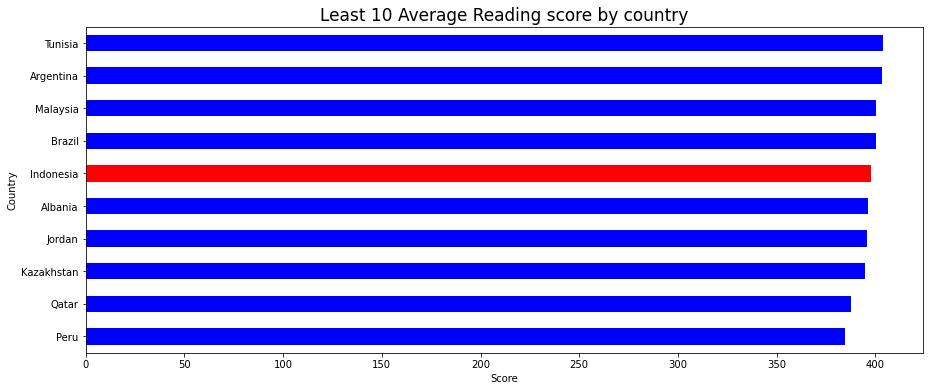

In [10]:
course_dict = {'PV1READ' : 'Reading'}
ind_colors = {
    'PV1READ' : ['blue', 'blue', 'blue', 'blue', 'blue','red', 'blue', 'blue', 'blue',  'blue'],
}

plot_score(course_dict, ind_colors)


Something should be done to calculators (preferably Graphing😁) to Indonesian students

# 3. Money cannot buy it all

> Qatar is the richest country. But as we see from the previous plot, They rank 3rd lowest on both math and science scores and 2nd lowest on reading scores.



In [11]:
def plot_riches(series, color = 'green', title =  'Top 10 Richest student countries'):
    
    
    colors = sns.light_palette(color, n_colors=len(series))
    plt.figure(figsize = (15, 6))
    sns.barplot(data = series, x = 'WEALTH', y = 'CNT',palette=colors[-1::-1])
    plt.title(title, fontsize = 17
             )
    plt.xlabel('Wealth Measure value')
    plt.ylabel('Country');

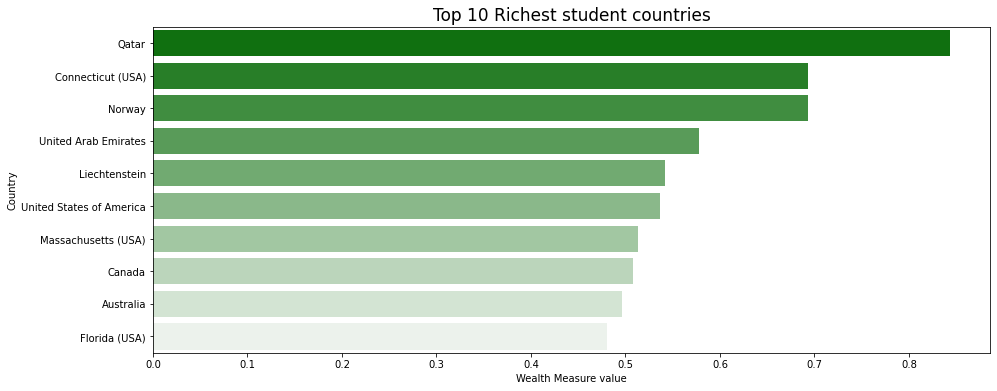

In [12]:
countries_wealth = df.groupby('CNT')['WEALTH'].mean().sort_values(ascending = False).reset_index().head(10)
plot_riches(countries_wealth, color = 'green', title = 'Top 10 Richest student countries')

On the other hand, Indonesia is the poorest country ☹

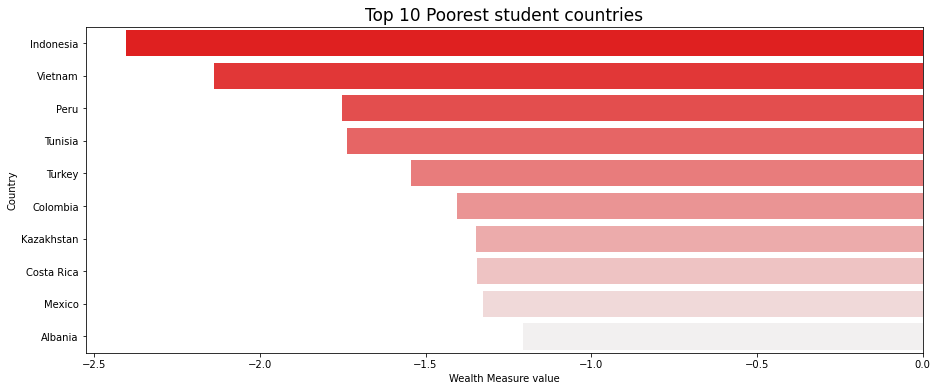

In [13]:
countries_pauve = df.groupby('CNT')['WEALTH'].mean().sort_values(ascending = True).reset_index().head(10)
plot_riches(countries_pauve, color = 'red', title = 'Top 10 Poorest student countries')

We must do what we can to change the situation of learners in Indonesia

#                                                            Thank you



In [1]:
!jupyter nbconvert Part_II_PISA_Data_analysis.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_PISA_Data_analysis.ipynb to slides
[NbConvertApp] Writing 802814 bytes to Part_II_PISA_Data_analysis.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\Praprara\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\Praprara\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\Praprara\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\Praprara\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\Praprara\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_noteb